Cosine similarity BERT sentence Transformers 

https://www.sbert.net/docs/pretrained_models.html
all-mpnet-base-v2 is chosen based on performance ssentence embeddings

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-mpnet-base-v2')

/Users/mstudio/miniforge3/envs/hemingway/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
data=pd.read_csv('/Volumes/T7/mt-hemingway/data/book_final.csv')
cosine_df=pd.read_csv('/Volumes/T7/mt-hemingway/data/cosine_df.csv')
korean_df=pd.read_csv('/Volumes/T7/mt-hemingway/data/korean_df.csv')

In [5]:
english_columns=['original', 'OPUS_small', 'OPUS_big', 'M2M100_small', 'M2M100_big', 'kakao_small', 'kakao_big', 'google_small', 'goggle_big']

In [6]:
korean_columns=['small', 'big', 'kakao_org', 'M2M100_org', 'google_org']

In [7]:
print(len(english_columns), len(korean_columns))

9 5


In [4]:
def get_similarity_score(df:pd.DataFrame, compare1:str, compare2:str):
    cosines=[]
    for idx, val in tqdm(df.iterrows()):
        embeddings1=model.encode(val[compare1], convert_to_tensor=True)
        embeddings2=model.encode(val[compare2], convert_to_tensor=True)
        cosine_scores = util.pytorch_cos_sim(embeddings1, embeddings2)
        cosines.append(cosine_scores[0][0].item())
    return cosines   
        

In [9]:
original_OPUS_small=get_similarity_score(data, 'original', 'OPUS_small')
original_OPUS_big=get_similarity_score(data, 'original', 'OPUS_big')
original_M2M100_small=get_similarity_score(data, 'original', 'M2M100_small')
original_M2M100_big=get_similarity_score(data, 'original', 'M2M100_big')
original_kakao_small=get_similarity_score(data, 'original', 'kakao_small')
original_kakao_big=get_similarity_score(data, 'original', 'kakao_big')
original_google_small=get_similarity_score(data, 'original', 'google_small')
original_google_big=get_similarity_score(data, 'original', 'google_big')

768it [04:48,  2.66it/s]
768it [04:59,  2.56it/s]
768it [05:29,  2.33it/s]
768it [05:33,  2.30it/s]
768it [05:30,  2.33it/s]
768it [05:20,  2.40it/s]
768it [05:29,  2.33it/s]
768it [05:45,  2.23it/s]


In [10]:
cosine_df=pd.DataFrame({'OPUS_small':original_OPUS_small, 'OPUS_big':original_OPUS_big, 'M2M100_small':original_M2M100_small, 'M2M100_big':original_M2M100_big, 'kakao_small':original_kakao_small, 'kakao_big':original_kakao_big, 'google_small':original_google_small, 'google_big':original_google_big})

In [5]:
small_big=get_similarity_score(data, 'small', 'big')
small_kakao_org=get_similarity_score(data, 'small', 'kakao_org')
small_M2M100_org=get_similarity_score(data, 'small', 'M2M100_org')
small_google_org=get_similarity_score(data, 'small', 'google_org')
big_kakao_org=get_similarity_score(data, 'big', 'kakao_org')
big_M2M100_org=get_similarity_score(data, 'big', 'M2M100_org')
big_google_org=get_similarity_score(data, 'big', 'google_org')
kakao_org_M2M100_org=get_similarity_score(data, 'kakao_org', 'M2M100_org')
kakao_org_google_org=get_similarity_score(data, 'kakao_org', 'google_org')
M2M100_org_google_org=get_similarity_score(data, 'M2M100_org', 'google_org')

768it [18:40,  1.46s/it]
768it [11:36,  1.10it/s]
768it [11:11,  1.14it/s]
768it [11:21,  1.13it/s]
768it [12:34,  1.02it/s]
768it [11:58,  1.07it/s]
768it [11:48,  1.08it/s]
768it [11:06,  1.15it/s]
768it [10:55,  1.17it/s]


In [7]:
korean_df=pd.DataFrame({'small_big':small_big, 'small_kakao_org':small_kakao_org, 'small_M2M100_org':small_M2M100_org, 'small_google_org':small_google_org, 'big_kakao_org':big_kakao_org, 'big_M2M100_org':big_M2M100_org, 'big_google_org':big_google_org, 'kakao_org_M2M100_org':kakao_org_M2M100_org, 'kakao_org_google_org':kakao_org_google_org, 'M2M100_org_google_org':M2M100_org_google_org})
korean_df.to_csv('/Volumes/T7/mt-hemingway/data/korean_df.csv', index=False)

In [26]:
pos_opus_small=cosine_df['OPUS_small'].copy()
neg_opus_small=cosine_df['OPUS_small'].copy()
pos_opus_small[pos_opus_small<=0.5]=np.nan
neg_opus_small[neg_opus_small>0.5]=np.nan
pos_opus_big=cosine_df['OPUS_big'].copy()
neg_opus_big=cosine_df['OPUS_big'].copy()
pos_opus_big[pos_opus_big<=0.5]=np.nan
neg_opus_big[neg_opus_big>0.5]=np.nan
pos_m2m100_small=cosine_df['M2M100_small'].copy()
neg_m2m100_small=cosine_df['M2M100_small'].copy()
pos_m2m100_small[pos_m2m100_small<=0.5]=np.nan
neg_m2m100_small[neg_m2m100_small>0.5]=np.nan
pos_m2m100_big=cosine_df['M2M100_big'].copy()
neg_m2m100_big=cosine_df['M2M100_big'].copy()
pos_m2m100_big[pos_m2m100_big<=0.5]=np.nan
neg_m2m100_big[neg_m2m100_big>0.5]=np.nan
pos_kakao_small=cosine_df['kakao_small'].copy()
neg_kakao_small=cosine_df['kakao_small'].copy()
pos_kakao_small[pos_kakao_small<=0.5]=np.nan
neg_kakao_small[neg_kakao_small>0.5]=np.nan
pos_kakao_big=cosine_df['kakao_big'].copy()
neg_kakao_big=cosine_df['kakao_big'].copy()
pos_kakao_big[pos_kakao_big<=0.5]=np.nan
neg_kakao_big[neg_kakao_big>0.5]=np.nan
pos_google_small=cosine_df['google_small'].copy()
neg_google_small=cosine_df['google_small'].copy()
pos_google_small[pos_google_small<=0.5]=np.nan
neg_google_small[neg_google_small>0.5]=np.nan
pos_google_big=cosine_df['google_big'].copy()
neg_google_big=cosine_df['google_big'].copy()
pos_google_big[pos_google_big<=0.5]=np.nan
neg_google_big[neg_google_big>0.5]=np.nan

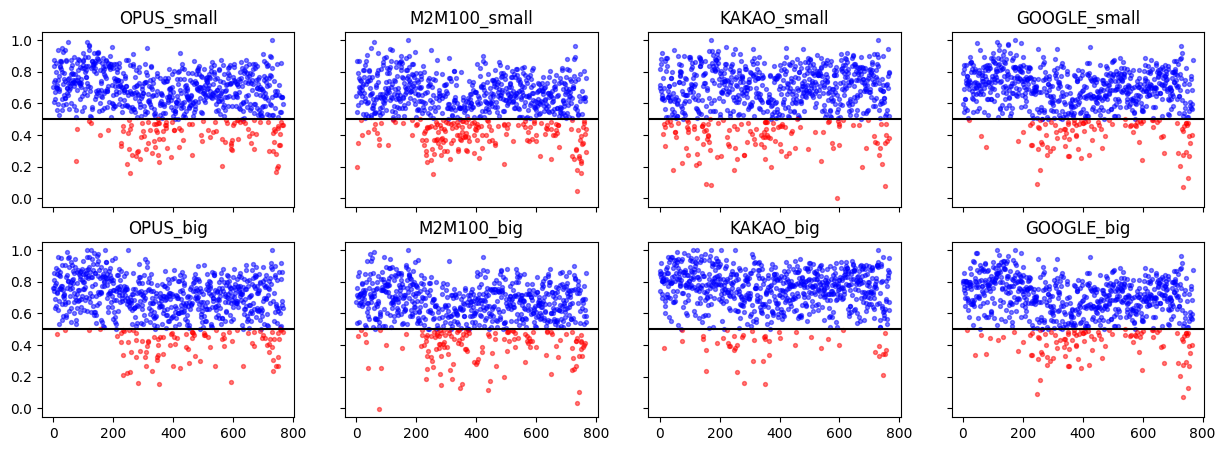

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 5), sharex=True, sharey=True)
axes[0,0].scatter(x=range(len(pos_opus_small)), y=pos_opus_small, color='blue', label='OPUS_small', alpha=0.5, s=8)
axes[0,0].scatter(x=range(len(neg_opus_small)), y=neg_opus_small, color='red', label='OPUS_small', alpha=0.5, s=8)
axes[0,0].axhline(y=0.5, color='black', linestyle='-')
axes[0,0].set_title('OPUS_small')
axes[1,0].scatter(x=range(len(pos_opus_big)), y=pos_opus_big, color='blue', label='OPUS_big', alpha=0.5, s=8)
axes[1,0].scatter(x=range(len(neg_opus_big)), y=neg_opus_big, color='red', label='OPUS_big', alpha=0.5, s=8)
axes[1,0].axhline(y=0.5, color='black', linestyle='-')
axes[1,0].set_title('OPUS_big')
axes[0,1].scatter(x=range(len(pos_m2m100_small)), y=pos_m2m100_small, color='blue', label='M2M100_small', alpha=0.5, s=8)
axes[0,1].scatter(x=range(len(neg_m2m100_small)), y=neg_m2m100_small, color='red', label='M2M100_small', alpha=0.5, s=8)
axes[0,1].axhline(y=0.5, color='black', linestyle='-')
axes[0,1].set_title('M2M100_small')
axes[1,1].scatter(x=range(len(pos_m2m100_big)), y=pos_m2m100_big, color='blue', label='M2M100_big', alpha=0.5, s=8)
axes[1,1].scatter(x=range(len(neg_m2m100_big)), y=neg_m2m100_big, color='red', label='M2M100_big', alpha=0.5, s=8)
axes[1,1].axhline(y=0.5, color='black', linestyle='-')
axes[1,1].set_title('M2M100_big')
axes[0,2].scatter(x=range(len(pos_kakao_small)), y=pos_kakao_small, color='blue', label='kakao_small', alpha=0.5, s=8)
axes[0,2].scatter(x=range(len(neg_kakao_small)), y=neg_kakao_small, color='red', label='kakao_small', alpha=0.5, s=8)
axes[0,2].axhline(y=0.5, color='black', linestyle='-')
axes[0,2].set_title('KAKAO_small')
axes[1,2].scatter(x=range(len(pos_kakao_big)), y=pos_kakao_big, color='blue', label='kakao_big', alpha=0.5, s=8)
axes[1,2].scatter(x=range(len(neg_kakao_big)), y=neg_kakao_big, color='red', label='kakao_big', alpha=0.5, s=8)
axes[1,2].axhline(y=0.5, color='black', linestyle='-')
axes[1,2].set_title('KAKAO_big')
axes[0,3].scatter(x=range(len(pos_google_small)), y=pos_google_small, color='blue', label='google_small', alpha=0.5, s=8)
axes[0,3].scatter(x=range(len(neg_google_small)), y=neg_google_small, color='red', label='google_small', alpha=0.5, s=8)
axes[0,3].axhline(y=0.5, color='black', linestyle='-')
axes[0,3].set_title('GOOGLE_small')
axes[1,3].scatter(x=range(len(pos_google_big)), y=pos_google_big, color='blue', label='google_big', alpha=0.5, s=8)
axes[1,3].scatter(x=range(len(neg_google_big)), y=neg_google_big, color='red', label='google_big', alpha=0.5, s=8)
axes[1,3].axhline(y=0.5, color='black', linestyle='-')
axes[1,3].set_title('GOOGLE_big')
plt.savefig('/Volumes/T7/mt-hemingway/figure/english.png')
plt.show()


In [13]:
pos_small_big=korean_df['small_big'].copy()
neg_small_big=korean_df['small_big'].copy()
pos_small_big[pos_small_big<=0.5]=np.nan
neg_small_big[neg_small_big>0.5]=np.nan
pos_small_kakao=korean_df['small_kakao_org'].copy()
neg_small_kakao=korean_df['small_kakao_org'].copy()
pos_small_kakao[pos_small_kakao<=0.5]=np.nan
neg_small_kakao[neg_small_kakao>0.5]=np.nan
pos_small_M2M100=korean_df['small_M2M100_org'].copy()
neg_small_M2M100=korean_df['small_M2M100_org'].copy()
pos_small_M2M100[pos_small_M2M100<=0.5]=np.nan
neg_small_M2M100[neg_small_M2M100>0.5]=np.nan
pos_small_google=korean_df['small_google_org'].copy()
neg_small_google=korean_df['small_google_org'].copy()
pos_small_google[pos_small_google<=0.5]=np.nan
neg_small_google[neg_small_google>0.5]=np.nan
pos_big_kakao=korean_df['big_kakao_org'].copy()
neg_big_kakao=korean_df['big_kakao_org'].copy()
pos_big_kakao[pos_big_kakao<=0.5]=np.nan
neg_big_kakao[neg_big_kakao>0.5]=np.nan
pos_big_M2M100=korean_df['big_M2M100_org'].copy()
neg_big_M2M100=korean_df['big_M2M100_org'].copy()
pos_big_M2M100[pos_big_M2M100<=0.5]=np.nan
neg_big_M2M100[neg_big_M2M100>0.5]=np.nan
pos_big_google=korean_df['big_google_org'].copy()
neg_big_google=korean_df['big_google_org'].copy()
pos_big_google[pos_big_google<=0.5]=np.nan
neg_big_google[neg_big_google>0.5]=np.nan
pos_kakao_M2M100=korean_df['kakao_org_M2M100_org'].copy()
neg_kakao_M2M100=korean_df['kakao_org_M2M100_org'].copy()
pos_kakao_M2M100[pos_kakao_M2M100<=0.5]=np.nan
neg_kakao_M2M100[neg_kakao_M2M100>0.5]=np.nan
pos_kakao_google=korean_df['kakao_org_google_org'].copy()
neg_kakao_google=korean_df['kakao_org_google_org'].copy()
pos_kakao_google[pos_kakao_google<=0.5]=np.nan
neg_kakao_google[neg_kakao_google>0.5]=np.nan
pos_M2M100_google=korean_df['M2M100_org_google_org'].copy()
neg_M2M100_google=korean_df['M2M100_org_google_org'].copy()
pos_M2M100_google[pos_M2M100_google<=0.5]=np.nan
neg_M2M100_google[neg_M2M100_google>0.5]=np.nan

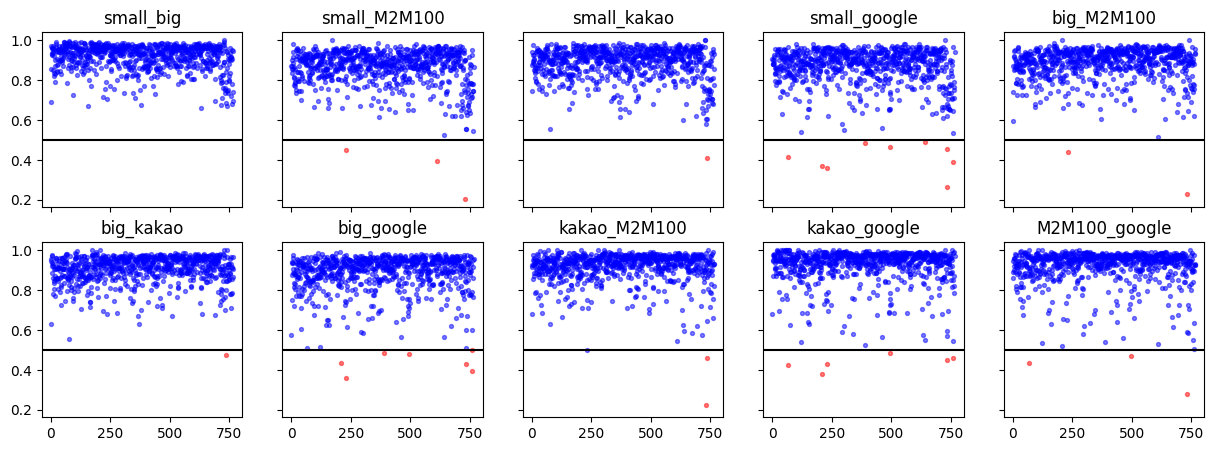

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5), sharex=True, sharey=True)
axes[0,0].scatter(x=range(len(pos_small_big)), y=pos_small_big, color='blue', label='small_big', alpha=0.5, s=8)
axes[0,0].scatter(x=range(len(neg_small_big)), y=neg_small_big, color='red', label='small_big', alpha=0.5, s=8)
axes[0,0].axhline(y=0.5, color='black', linestyle='-')
axes[0,0].set_title('small_big')
axes[0,1].scatter(x=range(len(pos_small_M2M100)), y=pos_small_M2M100, color='blue', label='small_M2M100', alpha=0.5, s=8)
axes[0,1].scatter(x=range(len(neg_small_M2M100)), y=neg_small_M2M100, color='red', label='small_M2M100', alpha=0.5, s=8)
axes[0,1].axhline(y=0.5, color='black', linestyle='-')
axes[0,1].set_title('small_M2M100')
axes[0,2].scatter(x=range(len(pos_small_kakao)), y=pos_small_kakao, color='blue', label='small_kakao', alpha=0.5, s=8)
axes[0,2].scatter(x=range(len(neg_small_kakao)), y=neg_small_kakao, color='red', label='small_kakao', alpha=0.5, s=8)
axes[0,2].axhline(y=0.5, color='black', linestyle='-')
axes[0,2].set_title('small_kakao')
axes[0,3].scatter(x=range(len(pos_small_google)), y=pos_small_google, color='blue', label='small_google', alpha=0.5, s=8)
axes[0,3].scatter(x=range(len(neg_small_google)), y=neg_small_google, color='red', label='small_google', alpha=0.5, s=8)
axes[0,3].axhline(y=0.5, color='black', linestyle='-')
axes[0,3].set_title('small_google')
axes[0,4].scatter(x=range(len(pos_big_M2M100)), y=pos_big_M2M100, color='blue', label='big_M2M100', alpha=0.5, s=8)
axes[0,4].scatter(x=range(len(neg_big_M2M100)), y=neg_big_M2M100, color='red', label='big_M2M100', alpha=0.5, s=8)
axes[0,4].axhline(y=0.5, color='black', linestyle='-')
axes[0,4].set_title('big_M2M100')
axes[1,0].scatter(x=range(len(pos_big_kakao)), y=pos_big_kakao, color='blue', label='big_kakao', alpha=0.5, s=8)
axes[1,0].scatter(x=range(len(neg_big_kakao)), y=neg_big_kakao, color='red', label='big_kakao', alpha=0.5, s=8)
axes[1,0].axhline(y=0.5, color='black', linestyle='-')
axes[1,0].set_title('big_kakao')
axes[1,1].scatter(x=range(len(pos_big_google)), y=pos_big_google, color='blue', label='big_google', alpha=0.5, s=8)
axes[1,1].scatter(x=range(len(neg_big_google)), y=neg_big_google, color='red', label='big_google', alpha=0.5, s=8)
axes[1,1].axhline(y=0.5, color='black', linestyle='-')
axes[1,1].set_title('big_google')
axes[1,2].scatter(x=range(len(pos_kakao_M2M100)), y=pos_kakao_M2M100, color='blue', label='kakao_M2M100', alpha=0.5, s=8)
axes[1,2].scatter(x=range(len(neg_kakao_M2M100)), y=neg_kakao_M2M100, color='red', label='kakao_M2M100', alpha=0.5, s=8)
axes[1,2].axhline(y=0.5, color='black', linestyle='-')
axes[1,2].set_title('kakao_M2M100')
axes[1,3].scatter(x=range(len(pos_kakao_google)), y=pos_kakao_google, color='blue', label='kakao_google', alpha=0.5, s=8)
axes[1,3].scatter(x=range(len(neg_kakao_google)), y=neg_kakao_google, color='red', label='kakao_google', alpha=0.5, s=8)
axes[1,3].axhline(y=0.5, color='black', linestyle='-')
axes[1,3].set_title('kakao_google')
axes[1,4].scatter(x=range(len(pos_M2M100_google)), y=pos_M2M100_google, color='blue', label='M2M100_google', alpha=0.5, s=8)
axes[1,4].scatter(x=range(len(neg_M2M100_google)), y=neg_M2M100_google, color='red', label='M2M100_google', alpha=0.5, s=8)
axes[1,4].axhline(y=0.5, color='black', linestyle='-')
axes[1,4].set_title('M2M100_google')
plt.savefig('/Volumes/T7/mt-hemingway/figure/korean.png')
plt.show()
